In [17]:
from langgraph.graph import StateGraph , START  , END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict ,Literal ,Annotated
from dotenv  import load_dotenv
from pydantic import BaseModel, Field                                   
from langchain.schema import BaseMessage
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.messages import BaseMessage, HumanMessage
load_dotenv()
from langgraph.checkpoint.memory import  MemorySaver

In [18]:

from langgraph.graph.message import add_messages

class ChatState(TypedDict):

    messages: Annotated[list[BaseMessage], add_messages]

In [19]:
model = ChatGoogleGenerativeAI(model="gemini-2.5-flash", temperature=0)

In [20]:
def chat_node(state: ChatState):

    # take user query from state
    messages = state['messages']

    # send to llm
    response = model.invoke(messages)

    # response store state
    return {'messages': [response]}

In [21]:
checkpointer  = MemorySaver()
graph = StateGraph(ChatState)

# add nodes
graph.add_node('chat_node', chat_node)

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

chatbot = graph.compile(checkpointer=checkpointer)

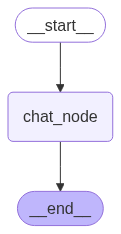

In [22]:
chatbot

In [24]:
thread_id = '1'
while True : 
    user_input = input("You: ")
    print("USER :" ,user_input)
    if user_input.strip().lower() == 'exit':
        break
    config = {'configurable' : {'thread_id': thread_id}}
    
    response = chatbot.invoke(
        {'messages': [HumanMessage(content=user_input)]},
        config=config
        )
    print(f"Chatbot: {response['messages'][-1].content}")
    
    

USER : hello my name is pranay
Chatbot: Hello Pranay! It's nice to meet you.

How can I help you today?
USER : what is my name
Chatbot: Your name is Pranay.
USER : my name is also ronaldo
Chatbot: Okay, so your name is Pranay, and also Ronaldo!

That's interesting! Do you use both names, or is one a nickname, a middle name, or perhaps a different identity you're using for this conversation?
USER : what is my name
Chatbot: Based on what you've told me, your name is **Pranay** and also **Ronaldo**.
USER : 10  + 10
Chatbot: 10 + 10 = **20**
USER : multiply the output by 2
Chatbot: Okay, the previous output was 20.

20 * 2 = **40**
USER : what is 10   + 10
Chatbot: 10 + 10 = **20**
USER : exit


In [28]:
chatbot.get_state(config=config).values

{'messages': [HumanMessage(content='hello my name is pranay', additional_kwargs={}, response_metadata={}, id='7b393a57-3e26-4073-a758-fc20a5c12c34'),
  AIMessage(content="Hello Pranay! It's nice to meet you.\n\nHow can I help you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--5d75d9eb-77c9-48bd-88e7-7a41741523ae-0', usage_metadata={'input_tokens': 7, 'output_tokens': 160, 'total_tokens': 167, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 140}}),
  HumanMessage(content='what is my name', additional_kwargs={}, response_metadata={}, id='49f6b7be-53c0-4f2b-bd14-8d8e12c01df3'),
  AIMessage(content='Your name is Pranay.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, i